# Test 2 : DEM from drone imagery

# Study case 1:

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from LNC import get_dln, f_lnd, fdln

In [2]:
# Load DEM
dem = rasterio.open('tifs/MNT_carriere.tif')

# Load aspect (slope)
asp0 = rasterio.open('tifs/MNT_carriere_aspect0.tif')

asp1 = rasterio.open('tifs/MNT_carriere_aspect_trigo.tif')

In [3]:
print("\nDEM\n")
print(dem.profile)
print("\nASPECT 0\n")
print(asp0.profile)
print("\nASPECT 1\n")
print(asp1.profile)


DEM

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 4687, 'height': 3207, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.3001530000000024, 0.0, 310946.796760818,
       0.0, -0.3001530000000221, 5170200.44282133), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

ASPECT 0

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4687, 'height': 3207, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.3001530000000024, 0.0, 310946.796760818,
       0.0, -0.3001530000000221, 5170200.44282133), 'tiled': False, 'interleave': 'band'}

ASPECT 1

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4687, 'height': 3207, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.3001530000000024, 0.0, 310946.796760818,
       0.0, -0.3001530000000221, 5170200.44282133), 'tiled': False, 'interleave': 'band'}


In [4]:
# reading the first band (not from zero!)
band1 = dem.read(1)

In [5]:
# Preview of the 
band1

array([[-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       ...,
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.]],
      dtype=float32)

In [6]:
band1 = band1.flatten()

In [7]:
f1 = get_dln(band1)

In [8]:
n = sum(f1)
ff1 = []
for i in range(len(f1)):
    ff1.append(100*f1[i]/n)


In [9]:
f_lnd(f1)

digit | frequency
    1 |   0.00
    2 |   0.00
    3 |   0.00
    4 |  41.92
    5 |  56.07
    6 |   2.02
    7 |   0.00
    8 |   0.00
    9 |   0.00


In [10]:
# reading the first band (not from zero!)
band2 = asp0.read(1) # 2d array

In [11]:
band2 = band2.flatten()

In [12]:
f2 = get_dln(band2)

In [13]:
n2 = sum(f2)
ff2 = []
for i in range(len(f2)):
    ff2.append(100*f2[i]/n2)


In [14]:
f_lnd(f2)

digit | frequency
    1 |  49.29
    2 |  20.49
    3 |  11.37
    4 |   2.78
    5 |   2.89
    6 |   2.70
    7 |   3.22
    8 |   3.35
    9 |   3.91


In [15]:
# reading the first band (not from zero!)
band3 = asp1.read(1) # 2d array

In [16]:
band3 = band3.flatten()

In [17]:
f3 = get_dln(band3)

In [18]:
n3 = sum(f3)
ff3 = []
for i in range(len(f3)):
    ff3.append(100*f3[i]/n2)


In [19]:
f_lnd(f3)

digit | frequency
    1 |  15.89
    2 |  36.96
    3 |  28.90
    4 |   2.79
    5 |   2.72
    6 |   3.04
    7 |   3.85
    8 |   3.79
    9 |   2.06


In [20]:
X = list(range(1,  10))

B = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

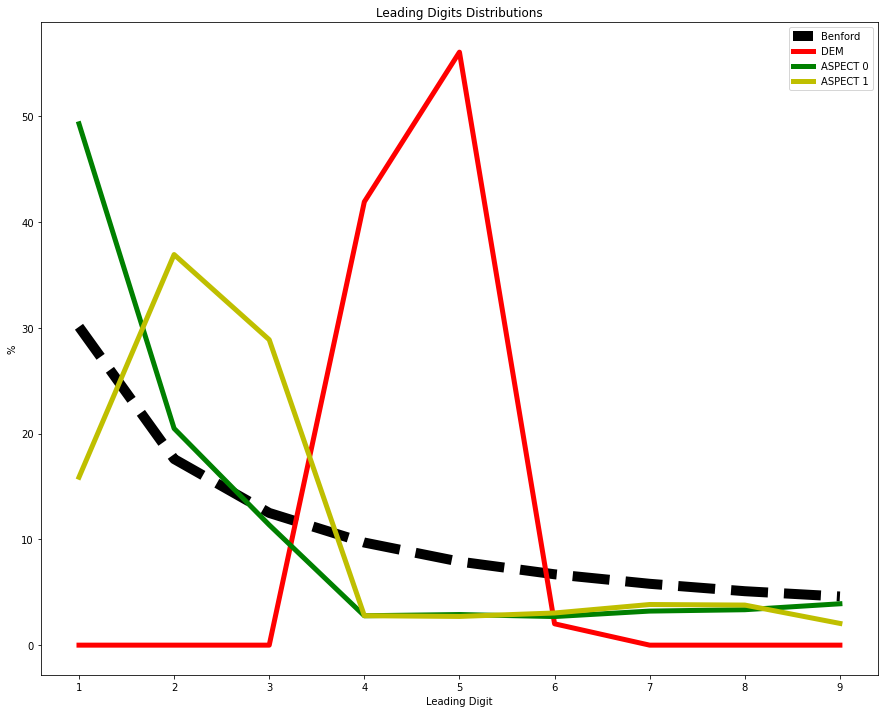

In [28]:
# Plotting both the curves simultaneously
plt.figure(figsize=(15, 12))
plt.plot(X, B, '--', color='k', label='Benford', linewidth=10)
plt.plot(X, ff1, color='r', label='DEM', linewidth=5)
plt.plot(X, ff2, color='g', label='ASPECT 0', linewidth=5)
plt.plot(X, ff3, color='y', label='ASPECT 1', linewidth=5)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Leading Digit")
plt.ylabel("%")
plt.title("Leading Digits Distributions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

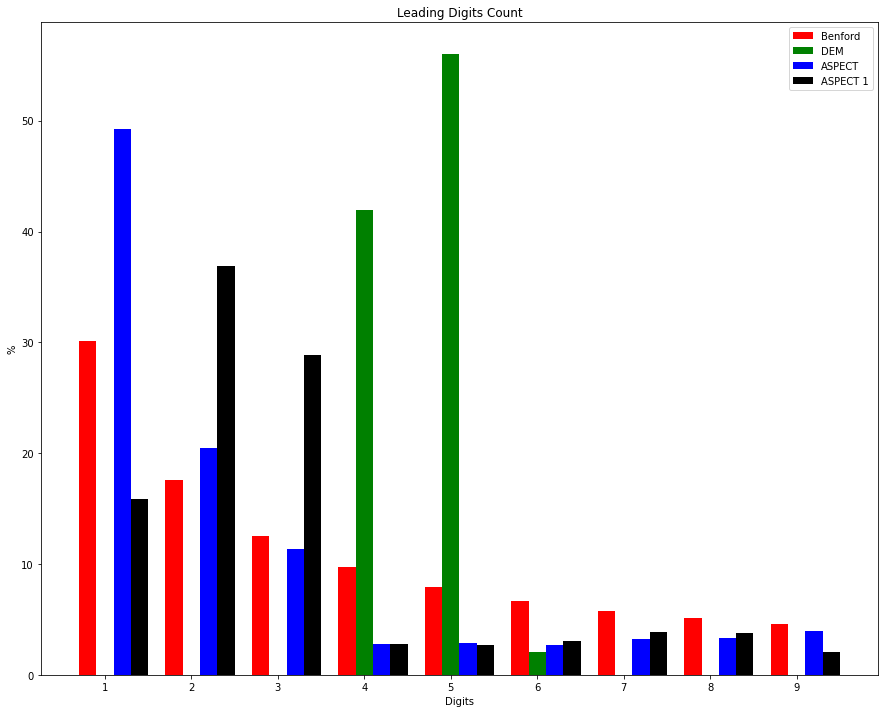

In [22]:
N = 9
ind = np.arange(N) 
width = 0.2

plt.figure(figsize=(15, 12))

bar1 = plt.bar(ind, B, width, color = 'r')

bar2 = plt.bar(ind+width, ff1, width, color='g')
  
bar3 = plt.bar(ind+width*2, ff2, width, color = 'b')

bar4 = plt.bar(ind+width*3, ff3, width, color = 'k')
  
plt.xlabel("Digits")
plt.ylabel('%')
plt.title("Leading Digits Count")
  
plt.xticks(ind+width,['1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend( (bar1, bar2, bar3, bar4), ('Benford', 'DEM', 'ASPECT', 'ASPECT 1') )
plt.show()